<a href="https://colab.research.google.com/github/swaroopkasaraneni/DatasciencePython/blob/main/DimRedCase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Scikit learn comes with the pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.[Hint:Explore datasets module from scikit learn]


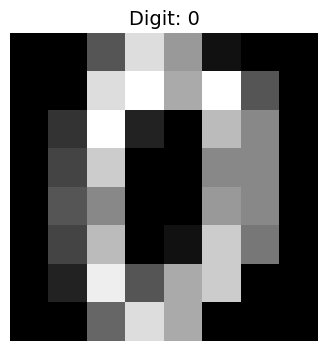

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

def plot_digit_image(index):
    """
    Plots the image of a handwritten digit from the digits dataset.

    Parameters:
    - index (int): Index of the digit in the dataset to plot.
    """
    if index < 0 or index >= len(digits.images):
        raise ValueError(f"Index must be between 0 and {len(digits.images) - 1}")

    image = digits.images[index]
    label = digits.target[index]

    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.title(f"Digit: {label}", fontsize=14)
    plt.axis('off')
    plt.show()

plot_digit_image(0)

2.Make a train-testsplit with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

digits = load_digits()

X = digits.data  # Flattened 8x8 images into 64-dimensional vectors
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Model Accuracy: 97.50%


3.Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.[Hint:Refer to decomposition module of scikit learn]

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data  # Features (flattened images)

pca = PCA(n_components=0.95, random_state=42)

X_pca = pca.fit_transform(X)
n_components = pca.n_components_
print(f"Number of components to explain 95% variance: {n_components}")


Number of components to explain 95% variance: 29


4.Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model andcomment on the accuracy.[Hint: Project both the train and test samples to the new subspace]

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model_pca = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', random_state=42)
model_pca.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Logistic Regression Accuracy with PCA: {accuracy_pca * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy with PCA: 95.83%


5.Compute the confusion matrix and count the number of instances that havegone wrong. For each wrong sample,plot the digit along with the predicted and original label.

Number of misclassified instances: 15


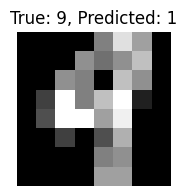

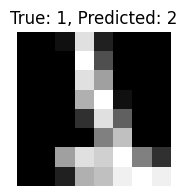

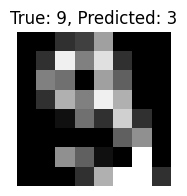

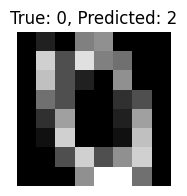

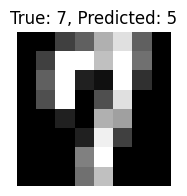

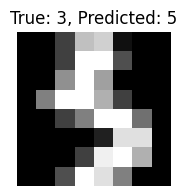

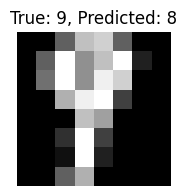

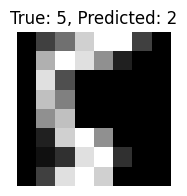

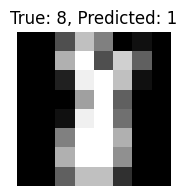

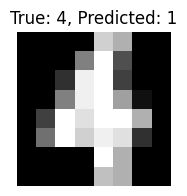

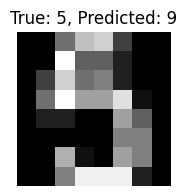

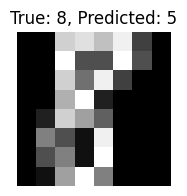

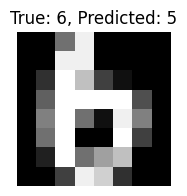

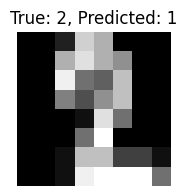

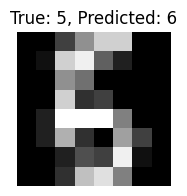

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred_pca)

num_wrong = np.sum(y_test != y_pred_pca)
print(f"Number of misclassified instances: {num_wrong}")

wrong_indices = np.where(y_test != y_pred_pca)[0]

for idx in wrong_indices:
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred_pca[idx]}")
    plt.axis('off')
    plt.show()
